In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Acceder al archivo csv
dataframe = pd.read_csv('DSCancerDePulmonSinDatosPerdidos.csv', sep=';')

In [7]:
dataframe.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,1.544444,62.027778,1.535185,1.451852,1.422222,1.401852,1.461111,1.605556,1.370370,1.394444,1.387037,1.431481,1.614815,1.314815,1.433333,0.500000
std,0.498483,9.337079,0.499223,0.498138,0.494372,0.490727,0.498948,0.489184,0.483352,0.489184,0.487524,0.495742,0.487090,0.464873,0.495995,0.500464
min,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,62.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.500000
75%,2.000000,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [9]:
#Definimos los valores para entrenar al algoritmo
y=dataframe['LUNG_CANCER']
x=dataframe.drop('LUNG_CANCER',axis=1)

In [11]:
#Entrenar el modelo
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)

from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=3)

knn_mm.fit(x_train,y_train)

predicciones=knn_mm.predict(x_test)

              precision    recall  f1-score   support

    Negativo       0.76      0.99      0.86        79
    Positivo       0.98      0.71      0.83        83

    accuracy                           0.85       162
   macro avg       0.87      0.85      0.84       162
weighted avg       0.88      0.85      0.84       162



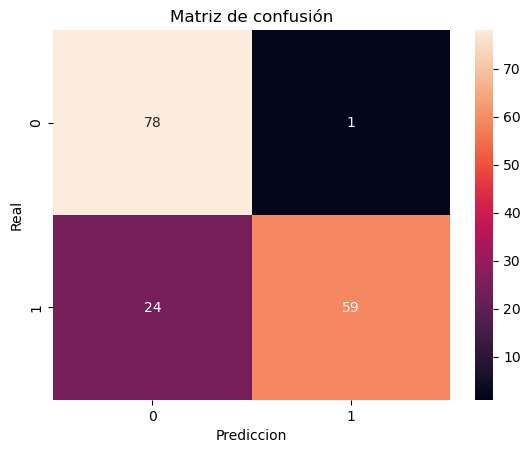

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
tn, fp, fn, tp = confusion_matrix(y_test,predicciones).ravel()

sns.heatmap(confusion_matrix(y_test,predicciones), annot=True,fmt="d")
plt.title("Matriz de confusión")
plt.xlabel('Prediccion')
plt.ylabel('Real')

print(classification_report(y_test,predicciones,target_names=["Negativo","Positivo"]))

In [15]:
print(knn_mm.predict(pd.DataFrame([[1,58,1,1,1,2,1,2,2,2,2,1,1,2,1]],columns=x.columns)))
print(knn_mm.predict_proba(pd.DataFrame([[1,58,1,1,1,2,1,2,2,2,2,1,1,2,1]],columns=x.columns)))

[1]
[[0.33333333 0.66666667]]


In [41]:
#Librerías para la conección entre el formulario HTML y el archivo Jupiter
from flask import Flask, render_template, request

In [51]:
#Nombre del módulo actual
app = Flask(__name__)

In [53]:
#Ruta que permite la comunicación con el formulario y métodos que le son permitidos
@app.route("/", methods=["GET", "POST"])
#Definimos la función de respuesta
def formulario():
    resultado = None
    try:
        if request.method == "POST":
            #Datos recibidos del formulario
            GENDER = int(request.form["GENDER"])
            AGE = int(request.form["AGE"])
            SMOKING = int(request.form["SMOKING"])
            YELLOW_FINGERS = int(request.form["YELLOW_FINGERS"])
            ANXIETY = int(request.form["ANXIETY"])
            PEER_PRESSURE = int(request.form["PEER_PRESSURE"])
            CHRONIC_DISEASE = int(request.form["CHRONIC_DISEASE"])
            FATIGUE = int(request.form["FATIGUE"])
            ALLERGY = int(request.form["ALLERGY"])
            WHEEZING = int(request.form["WHEEZING"])
            ALCOHOL_CONSUMING = int(request.form["ALCOHOL_CONSUMING"])
            COUGHING = int(request.form["COUGHING"])
            SHORTNESS_OF_BREATH = int(request.form["SHORTNESS_OF_BREATH"])
            SWALLOWING_DIFFICULTY = int(request.form["SWALLOWING_DIFFICULTY"])
            CHEST_PAIN = int(request.form["CHEST_PAIN"])

            #Verifica si los datos recibidos son coherentes con las indicaciones de la base de datos
            if (1 <= GENDER <= 2) and (1 <= AGE) and (1 <= SMOKING <= 2) and (1 <= YELLOW_FINGERS <= 2) and (1 <= ANXIETY <= 2) and (1 <= PEER_PRESSURE <= 2) and (1 <= CHRONIC_DISEASE <= 2) and (1 <= FATIGUE <= 2) and (1 <= ALLERGY <= 2) and (1 <= WHEEZING <= 2) and (1 <= ALCOHOL_CONSUMING <= 2) and (1 <= COUGHING <= 2) and (1 <= SHORTNESS_OF_BREATH <= 2) and (1 <= SWALLOWING_DIFFICULTY <= 2) and (1 <= CHEST_PAIN <= 2):
                #Respuesta del algoritmo
                prediccion = knn_mm.predict(pd.DataFrame([[GENDER, AGE, SMOKING, YELLOW_FINGERS, ANXIETY, PEER_PRESSURE, CHRONIC_DISEASE, FATIGUE, ALLERGY, WHEEZING, ALCOHOL_CONSUMING, COUGHING, SHORTNESS_OF_BREATH, SWALLOWING_DIFFICULTY, CHEST_PAIN]],columns=x.columns))
                prob_prediccion = knn_mm.predict_proba(pd.DataFrame([[GENDER, AGE, SMOKING, YELLOW_FINGERS, ANXIETY, PEER_PRESSURE, CHRONIC_DISEASE, FATIGUE, ALLERGY, WHEEZING, ALCOHOL_CONSUMING, COUGHING, SHORTNESS_OF_BREATH, SWALLOWING_DIFFICULTY, CHEST_PAIN]],columns=x.columns))

                
                #Generando respuesta según los resultados de la predicción
                match int(prediccion[0]):
                    case 0:
                        probabilidad = round(float(prob_prediccion[0][0])*100,2)
                        resultado = f"El resultado es benigno con una probabilidad de {probabilidad}%."
                    case 1:
                        probabilidad = round(float(prob_prediccion[0][1])*100,2)
                        resultado = f"El resultado es maligno con una probabilidad de {probabilidad}%."
                print("Respuesta exitosa")
            else:
                resultado = "Datos inválidos, verifique si la información es correcta"
                print("Consulta inválida")
    
    except ValueError:
        resultado = "Hubo un error X_X, verifique sus datos"
        print("Error detectado")

    #Se busca el archivo formulario.html en la carpeta templates y se envía de respuesta
    return render_template("formulario.html", resultado=resultado)

In [ ]:
#Ejecución del archivo
if __name__ == "__main__":
    app.run(debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [05/May/2025 20:42:03] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2025 20:42:52] "POST / HTTP/1.1" 200 -


Respuesta exitosa
